In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('electric_vehicles_spec_2025.csv')
df.head()

,brand,model,top_speed_kmh,battery_capacity_kWh,battery_type,number_of_cells,torque_nm,efficiency_wh_per_km,range_km,acceleration_0_100_s,...,towing_capacity_kg,cargo_volume_l,seats,drivetrain,segment,length_mm,width_mm,height_mm,car_body_type,source_url
0,Abarth,500e Convertible,155,37.8,Lithium-ion,192.0,235.0,156,225,7.0,...,0.0,185,4,FWD,B - Compact,3673,1683,1518,Hatchback,https://ev-database.org/car/1904/Abarth-500e-C...
1,Abarth,500e Hatchback,155,37.8,Lithium-ion,192.0,235.0,149,225,7.0,...,0.0,185,4,FWD,B - Compact,3673,1683,1518,Hatchback,https://ev-database.org/car/1903/Abarth-500e-H...
2,Abarth,600e Scorpionissima,200,50.8,Lithium-ion,102.0,345.0,158,280,5.9,...,0.0,360,5,FWD,JB - Compact,4187,1779,1557,SUV,https://ev-database.org/car/3057/Abarth-600e-S...
3,Abarth,600e Turismo,200,50.8,Lithium-ion,102.0,345.0,158,280,6.2,...,0.0,360,5,FWD,JB - Compact,4187,1779,1557,SUV,https://ev-database.org/car/3056/Abarth-600e-T...
4,Aiways,U5,150,60.0,Lithium-ion,NaN,310.0,156,315,7.5,...,NaN,496,5,FWD,JC - Medium,4680,1865,1700,SUV,https://ev-database.org/car/1678/Aiways-U5


# Data Cleaning and Inspection

In [4]:
df.shape

(478, 22)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478 entries, 0 to 477
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   brand                      478 non-null    object 
 1   model                      477 non-null    object 
 2   top_speed_kmh              478 non-null    int64  
 3   battery_capacity_kWh       478 non-null    float64
 4   battery_type               478 non-null    object 
 5   number_of_cells            276 non-null    float64
 6   torque_nm                  471 non-null    float64
 7   efficiency_wh_per_km       478 non-null    int64  
 8   range_km                   478 non-null    int64  
 9   acceleration_0_100_s       478 non-null    float64
 10  fast_charging_power_kw_dc  477 non-null    float64
 11  fast_charge_port           477 non-null    object 
 12  towing_capacity_kg         452 non-null    float64
 13  cargo_volume_l             477 non-null    object 

In [6]:
df.duplicated().sum()

0

In [7]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
top_speed_kmh,478.0,185.487448,34.252773,125.0,160.0,180.00,201.00,325.0
battery_capacity_kWh,478.0,74.043724,20.331058,21.3,60.0,76.15,90.60,118.0
number_of_cells,276.0,485.293478,1210.819733,72.0,150.0,216.00,324.00,7920.0
torque_nm,471.0,498.012739,241.461128,113.0,305.0,430.00,679.00,1350.0
efficiency_wh_per_km,478.0,162.903766,34.317532,109.0,143.0,155.00,177.75,370.0
range_km,478.0,393.179916,103.287335,135.0,320.0,397.50,470.00,685.0
acceleration_0_100_s,478.0,6.882636,2.730696,2.2,4.8,6.60,8.20,19.1
fast_charging_power_kw_dc,477.0,125.008386,58.205012,29.0,80.0,113.00,150.00,281.0
towing_capacity_kg,452.0,1052.261062,737.851774,0.0,500.0,1000.00,1600.00,2500.0
seats,478.0,5.263598,1.003961,2.0,5.0,5.00,5.00,9.0


In [8]:
df.isnull().sum()

brand                          0
model                          1
top_speed_kmh                  0
battery_capacity_kWh           0
battery_type                   0
number_of_cells              202
torque_nm                      7
efficiency_wh_per_km           0
range_km                       0
acceleration_0_100_s           0
fast_charging_power_kw_dc      1
fast_charge_port               1
towing_capacity_kg            26
cargo_volume_l                 1
seats                          0
drivetrain                     0
segment                        0
length_mm                      0
width_mm                       0
height_mm                      0
car_body_type                  0
source_url                     0
dtype: int64

In [9]:
df.drop(columns=['number_of_cells'],inplace=True)

In [10]:
df=df[df['model'].notnull()]

In [11]:
df=df[df['torque_nm'].notnull()]

In [12]:
df=df[df['fast_charging_power_kw_dc'].notnull()]

In [13]:
df=df[df['fast_charge_port'].notnull()]

In [14]:
df=df[df['fast_charge_port'].notnull()]

In [15]:
df=df[df['cargo_volume_l'].notnull()]

In [16]:
df.drop(columns=['towing_capacity_kg'],inplace=True)

In [17]:
df.drop(columns=['source_url'],inplace=True)

In [18]:
df.head(10)

,brand,model,top_speed_kmh,battery_capacity_kWh,battery_type,torque_nm,efficiency_wh_per_km,range_km,acceleration_0_100_s,fast_charging_power_kw_dc,fast_charge_port,cargo_volume_l,seats,drivetrain,segment,length_mm,width_mm,height_mm,car_body_type
0,Abarth,500e Convertible,155,37.8,Lithium-ion,235.0,156,225,7.0,67.0,CCS,185,4,FWD,B - Compact,3673,1683,1518,Hatchback
1,Abarth,500e Hatchback,155,37.8,Lithium-ion,235.0,149,225,7.0,67.0,CCS,185,4,FWD,B - Compact,3673,1683,1518,Hatchback
2,Abarth,600e Scorpionissima,200,50.8,Lithium-ion,345.0,158,280,5.9,79.0,CCS,360,5,FWD,JB - Compact,4187,1779,1557,SUV
3,Abarth,600e Turismo,200,50.8,Lithium-ion,345.0,158,280,6.2,79.0,CCS,360,5,FWD,JB - Compact,4187,1779,1557,SUV
4,Aiways,U5,150,60.0,Lithium-ion,310.0,156,315,7.5,78.0,CCS,496,5,FWD,JC - Medium,4680,1865,1700,SUV
5,Aiways,U6,160,60.0,Lithium-ion,315.0,150,350,7.0,78.0,CCS,472,5,FWD,JC - Medium,4805,1880,1641,SUV
6,Alfa,Romeo Junior Elettrica 54 kWh,150,50.8,Lithium-ion,260.0,128,320,9.0,85.0,CCS,400,5,FWD,JB - Compact,4173,1781,1532,SUV
7,Alfa,Romeo Junior Elettrica 54 kWh Veloce,200,50.8,Lithium-ion,345.0,164,310,6.0,85.0,CCS,400,5,FWD,JB - Compact,4173,1781,1505,SUV
8,Alpine,A290 Electric 180 hp,160,52.0,Lithium-ion,285.0,138,310,7.4,70.0,CCS,326,5,FWD,B - Compact,3997,1823,1512,Hatchback
9,Alpine,A290 Electric 220 hp,170,52.0,Lithium-ion,300.0,144,305,6.4,70.0,CCS,326,5,FWD,B - Compact,3997,1823,1512,Hatchback


# Data Visualization

In [20]:
df['brand'].value_counts()

brand
Mercedes-Benz    42
Audi             28
Porsche          26
Volkswagen       23
Ford             21
BMW              20
Peugeot          19
Volvo            18
Smart            17
Kia              16
BYD              16
Opel             14
Hyundai          14
MG               12
NIO              12
Skoda            12
Citroen          12
Renault          10
XPENG             9
Polestar          9
Zeekr             9
Fiat              8
Mini              8
Tesla             7
Toyota            7
GWM               6
Nissan            6
Lotus             6
Genesis           5
DS                5
CUPRA             5
Abarth            4
Maserati          3
Lexus             3
Hongqi            3
Mazda             2
Alfa              2
Aiways            2
Leapmotor         2
Alpine            2
Jeep              2
VinFast           2
Dacia             2
Dongfeng          2
Skywell           2
Subaru            1
Voyah             1
Cadillac          1
Rolls-Royce       1
Elaris        

Text(0, 0.5, 'number of vehicles')

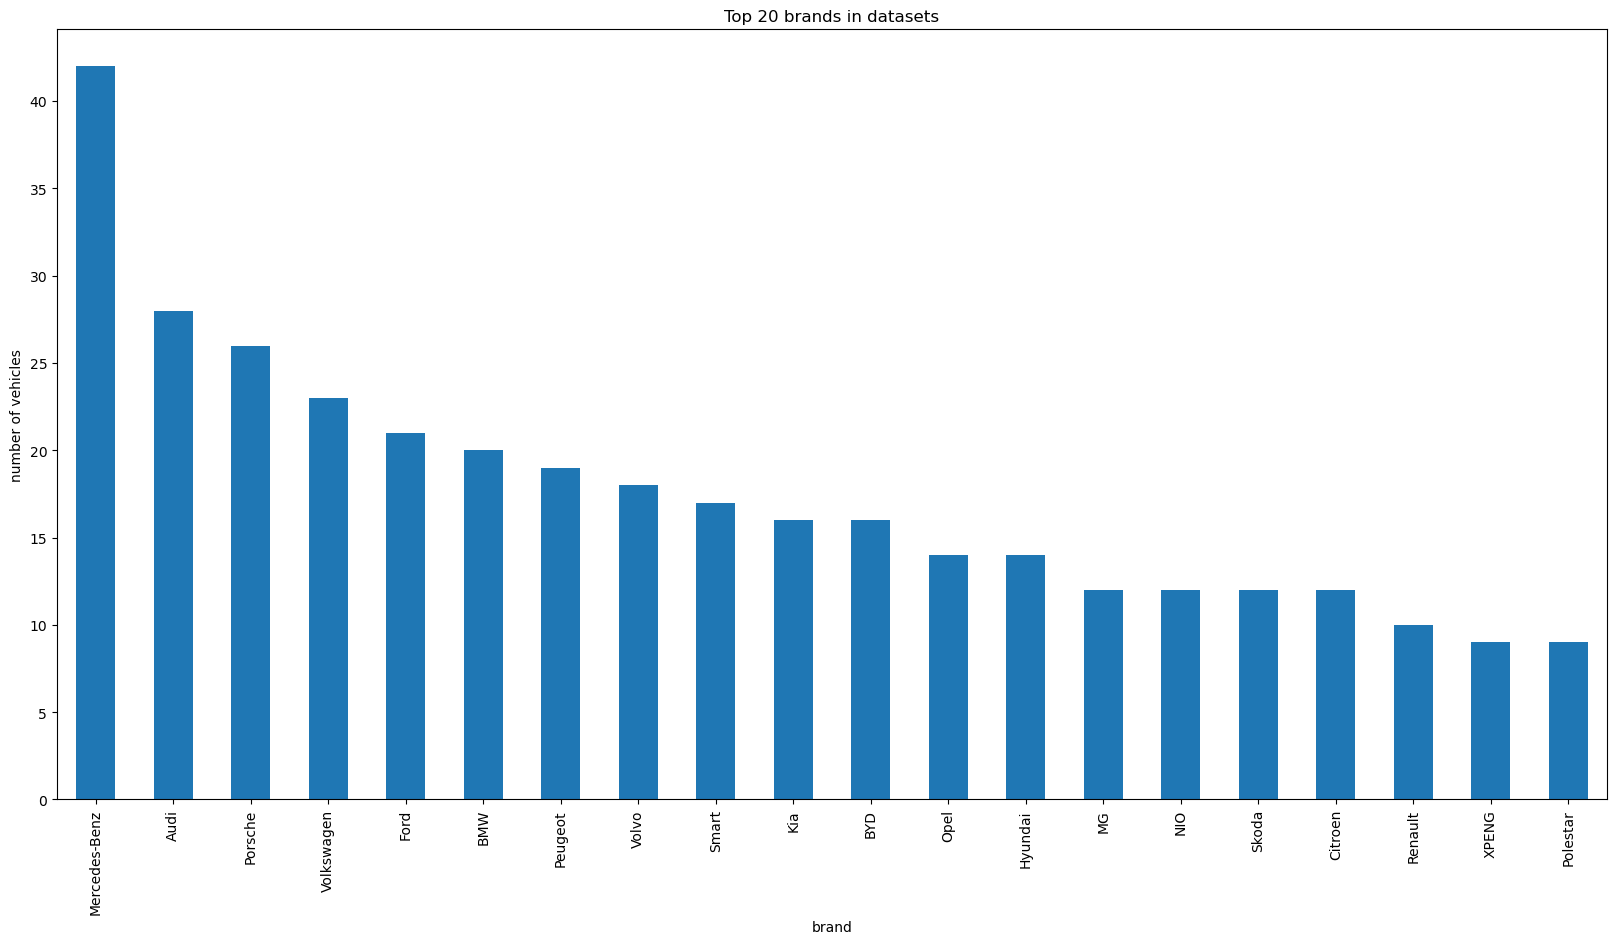

In [21]:
plt.figure(figsize=(20,10))
df['brand'].value_counts().head(20).plot(kind='bar')
plt.title('Top 20 brands in datasets')
plt.xlabel('brand')
plt.ylabel('number of vehicles')

# Visualizing brands with different models by top_speed_kmh

In [23]:
avg_speed=df.groupby('brand')['top_speed_kmh'].mean()

In [24]:
print(avg_speed.nlargest())

brand
Maserati       278.333333
Lucid          270.000000
Lotus          252.666667
Rolls-Royce    250.000000
Porsche        246.730769
Name: top_speed_kmh, dtype: float64


Text(0.5, 0, 'brand')

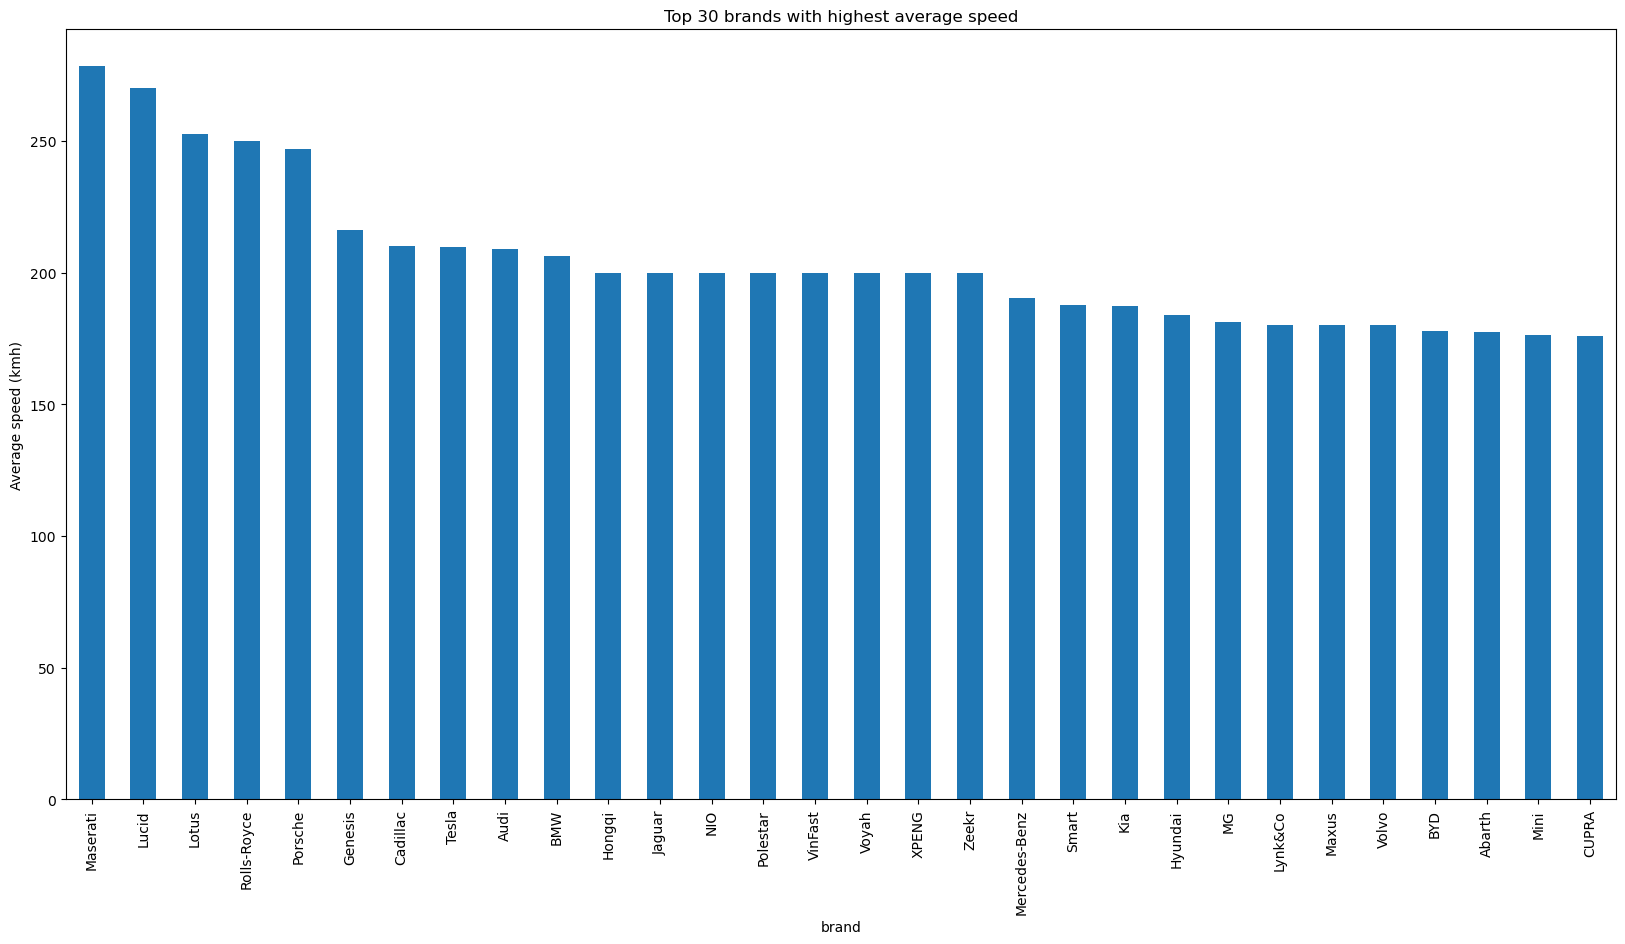

In [25]:
plt.figure(figsize=(20,10))
avg_speed.nlargest(30).plot(kind='bar')
plt.title('Top 30 brands with highest average speed')
plt.ylabel('Average speed (kmh)')
plt.xlabel('brand')

# Visualizing brands with different models by battery capacity(kWh)

In [27]:
avg_battery_capacity=df.groupby('brand')['battery_capacity_kWh'].mean()

In [28]:
print(avg_battery_capacity.nlargest())

brand
Lucid          112.00
Lotus          103.95
Cadillac       102.00
Rolls-Royce    102.00
Voyah          100.00
Name: battery_capacity_kWh, dtype: float64


Text(0.5, 0, 'brand')

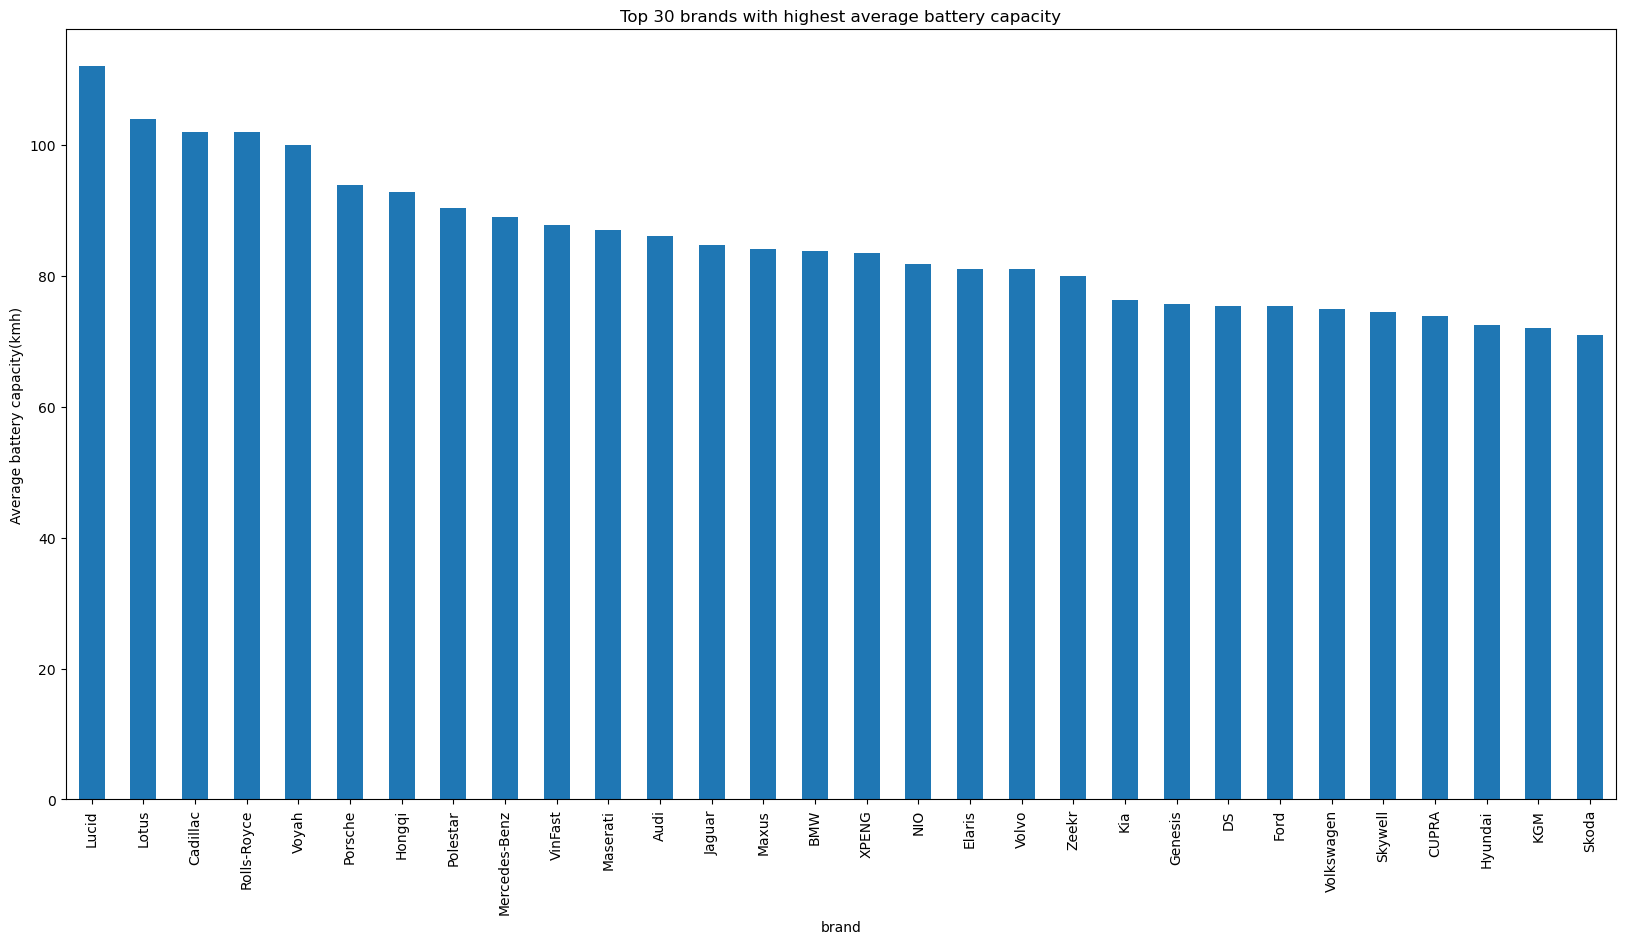

In [29]:
plt.figure(figsize=(20,10))
avg_battery_capacity.nlargest(30).plot(kind='bar')
plt.title('Top 30 brands with highest average battery capacity')
plt.ylabel('Average battery capacity(kmh)')
plt.xlabel('brand')

# Visualizing brands with different models by torque(nm)

In [31]:
avg_torque=df.groupby('brand')['torque_nm'].mean()

In [32]:
print(avg_torque.nlargest())

brand
Lucid          1200.000000
Maserati       1173.333333
Rolls-Royce     900.000000
Lotus           801.666667
Porsche         785.730769
Name: torque_nm, dtype: float64


Text(0.5, 0, 'brand')

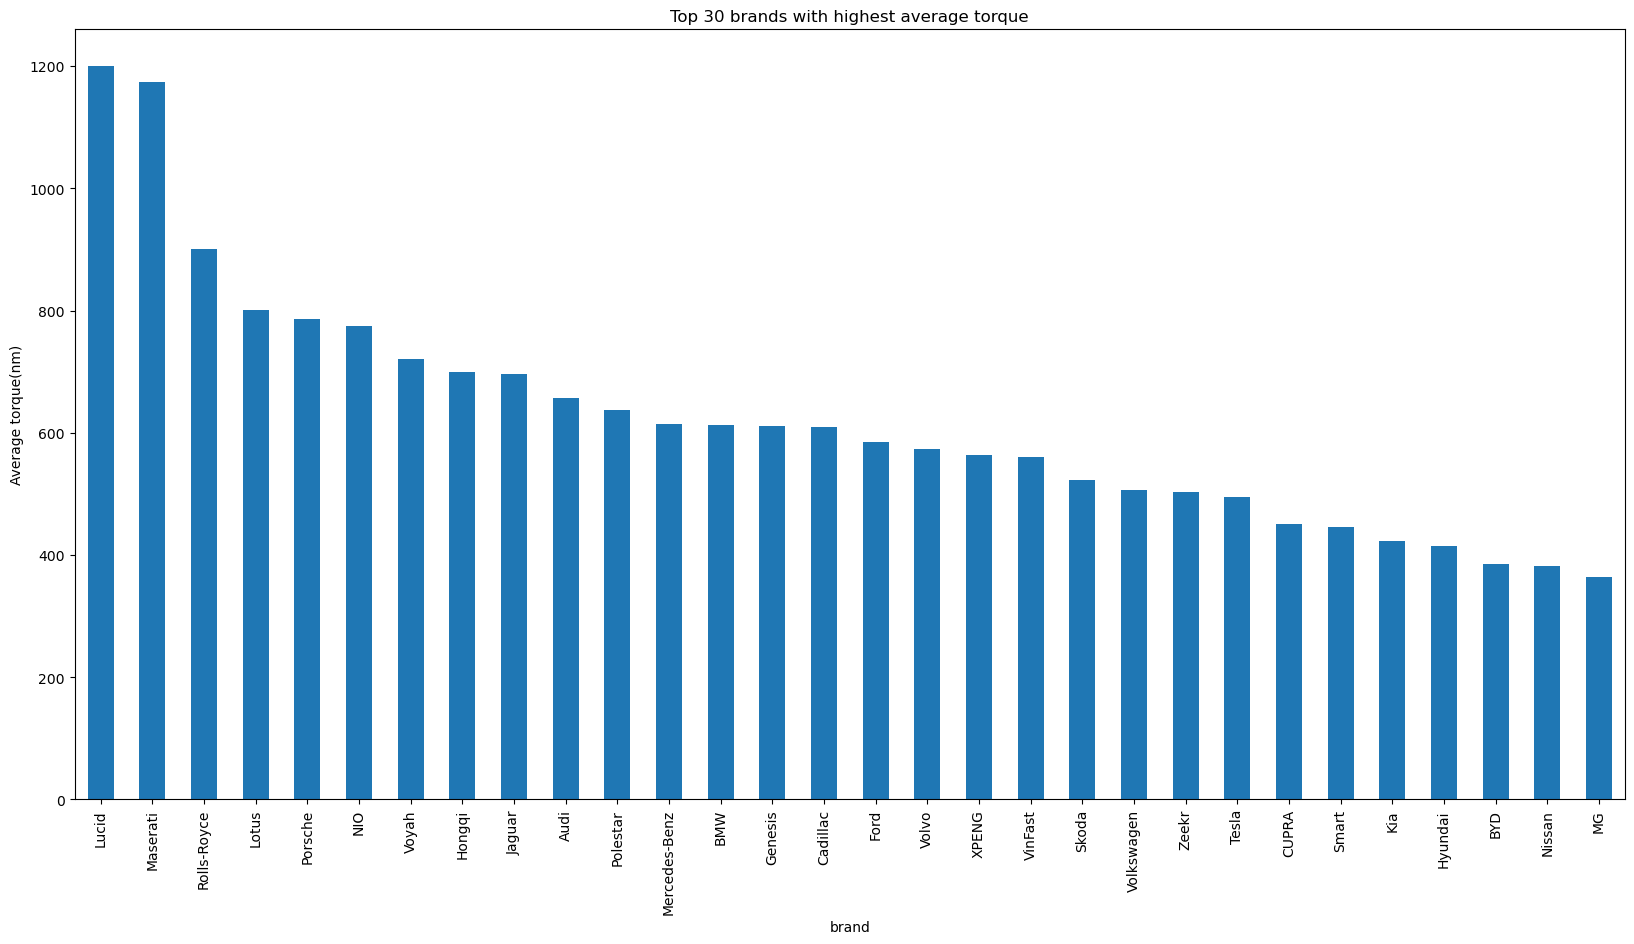

In [33]:
plt.figure(figsize=(20,10))
avg_torque.nlargest(30).plot(kind='bar')
plt.title('Top 30 brands with highest average torque')
plt.ylabel('Average torque(nm)')
plt.xlabel('brand')

# Visualizing brands with different models by efficiency(wh/km)

In [35]:
avg_efficiency=df.groupby('brand')['efficiency_wh_per_km'].mean()

In [36]:
print(avg_efficiency.nsmallest())

brand
Dacia       111.500
Fiat        120.125
Lancia      122.000
Tesla       124.000
Dongfeng    127.500
Name: efficiency_wh_per_km, dtype: float64


Text(0.5, 0, 'brand')

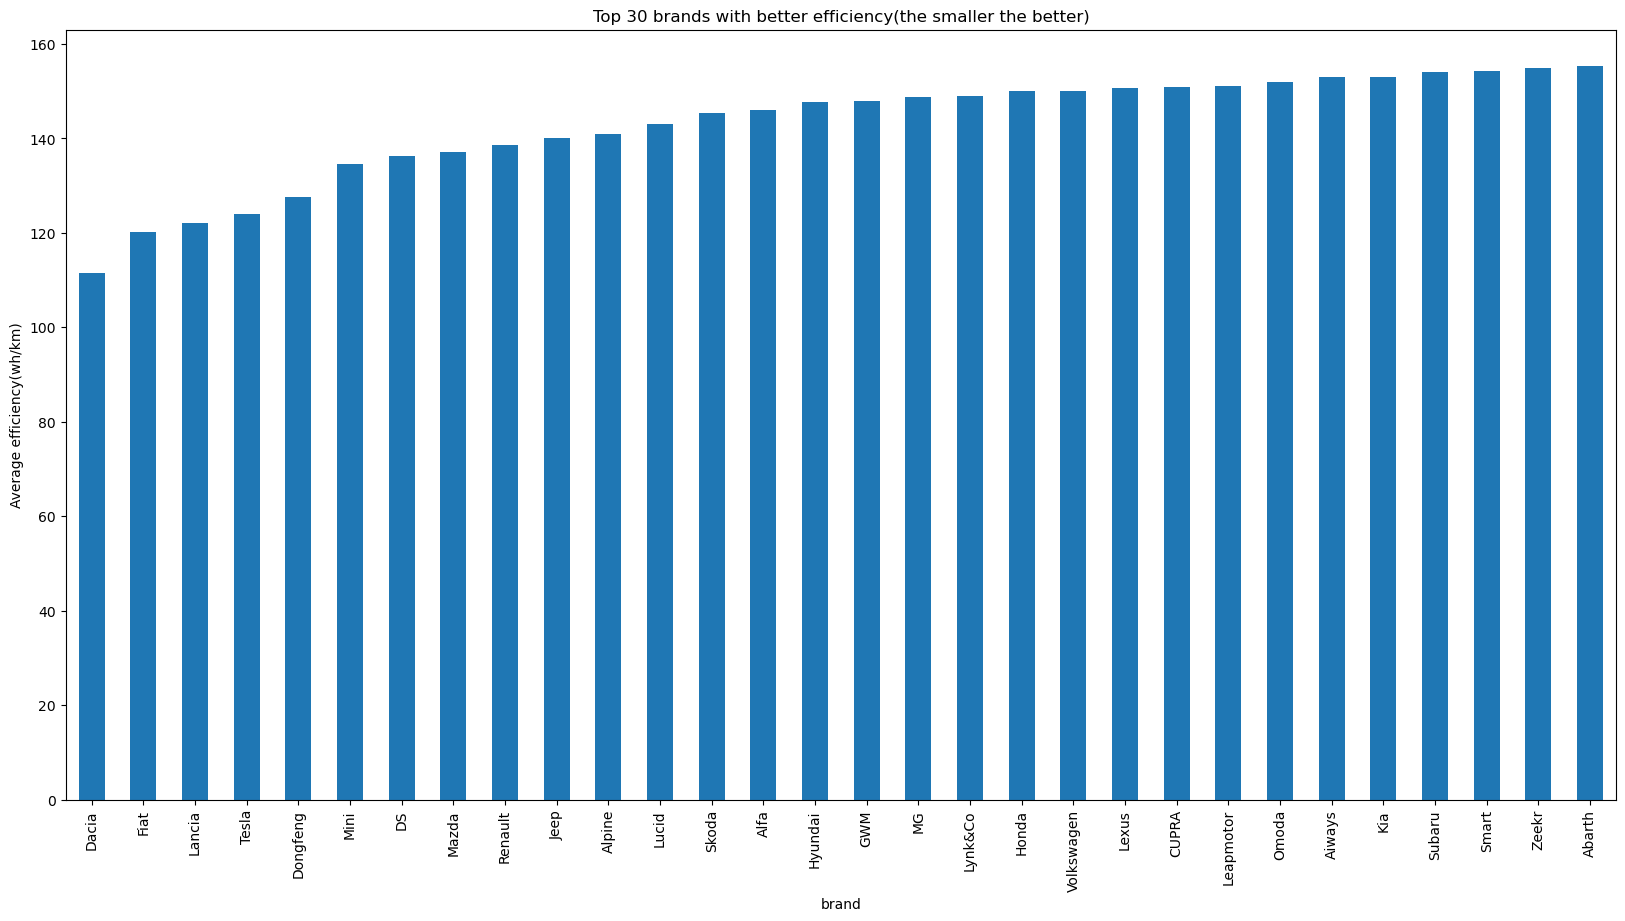

In [37]:
plt.figure(figsize=(20,10))
avg_efficiency.nsmallest(30).plot(kind='bar')
plt.title('Top 30 brands with better efficiency(the smaller the better)')
plt.ylabel('Average efficiency(wh/km)')
plt.xlabel('brand')

# Visualizing brands with different models by range(km)

In [39]:
avg_range=df.groupby('brand')['range_km'].mean()

In [40]:
print(avg_range.nlargest())

brand
Lucid      665.000000
Porsche    502.884615
Lotus      489.166667
Voyah      480.000000
Audi       478.392857
Name: range_km, dtype: float64


Text(0.5, 0, 'brand')

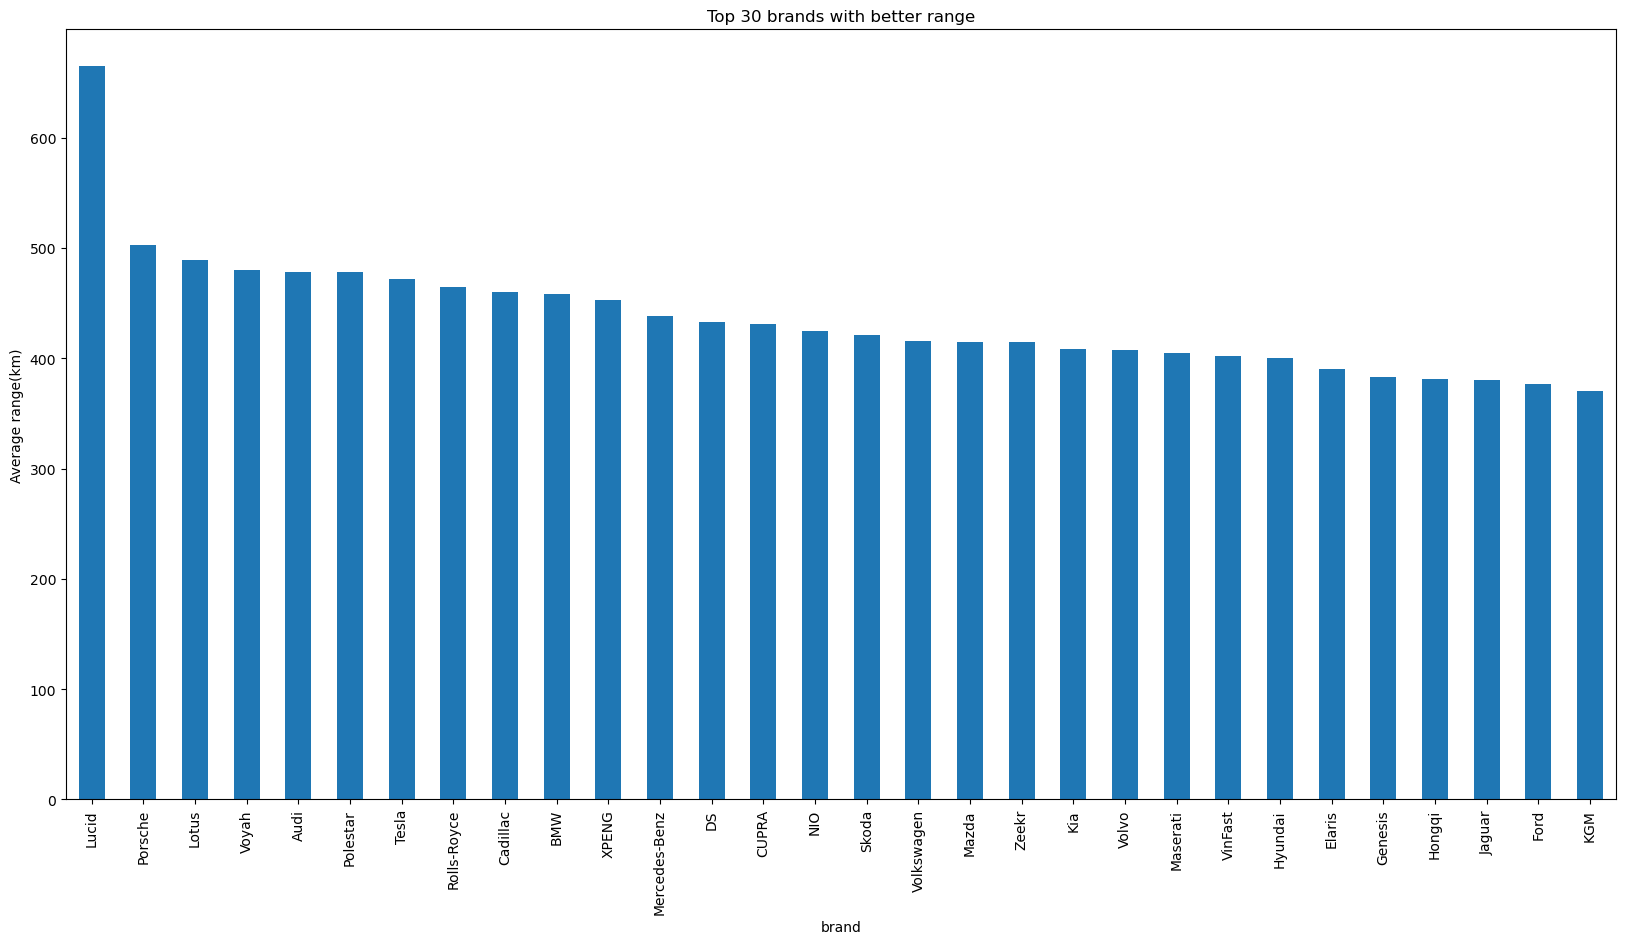

In [41]:
plt.figure(figsize=(20,10))
avg_range.nlargest(30).plot(kind='bar')
plt.title('Top 30 brands with better range')
plt.ylabel('Average range(km)')
plt.xlabel('brand')

# Visualizing brands with different models by acceleration

In [43]:
avg_acceleration=df.groupby('brand')['acceleration_0_100_s'].mean()

In [44]:
print(avg_acceleration.nlargest())

brand
Dacia       16.400000
Dongfeng    12.500000
Citroen     11.733333
Toyota      10.928571
Opel        10.857143
Name: acceleration_0_100_s, dtype: float64


Text(0.5, 0, 'brand')

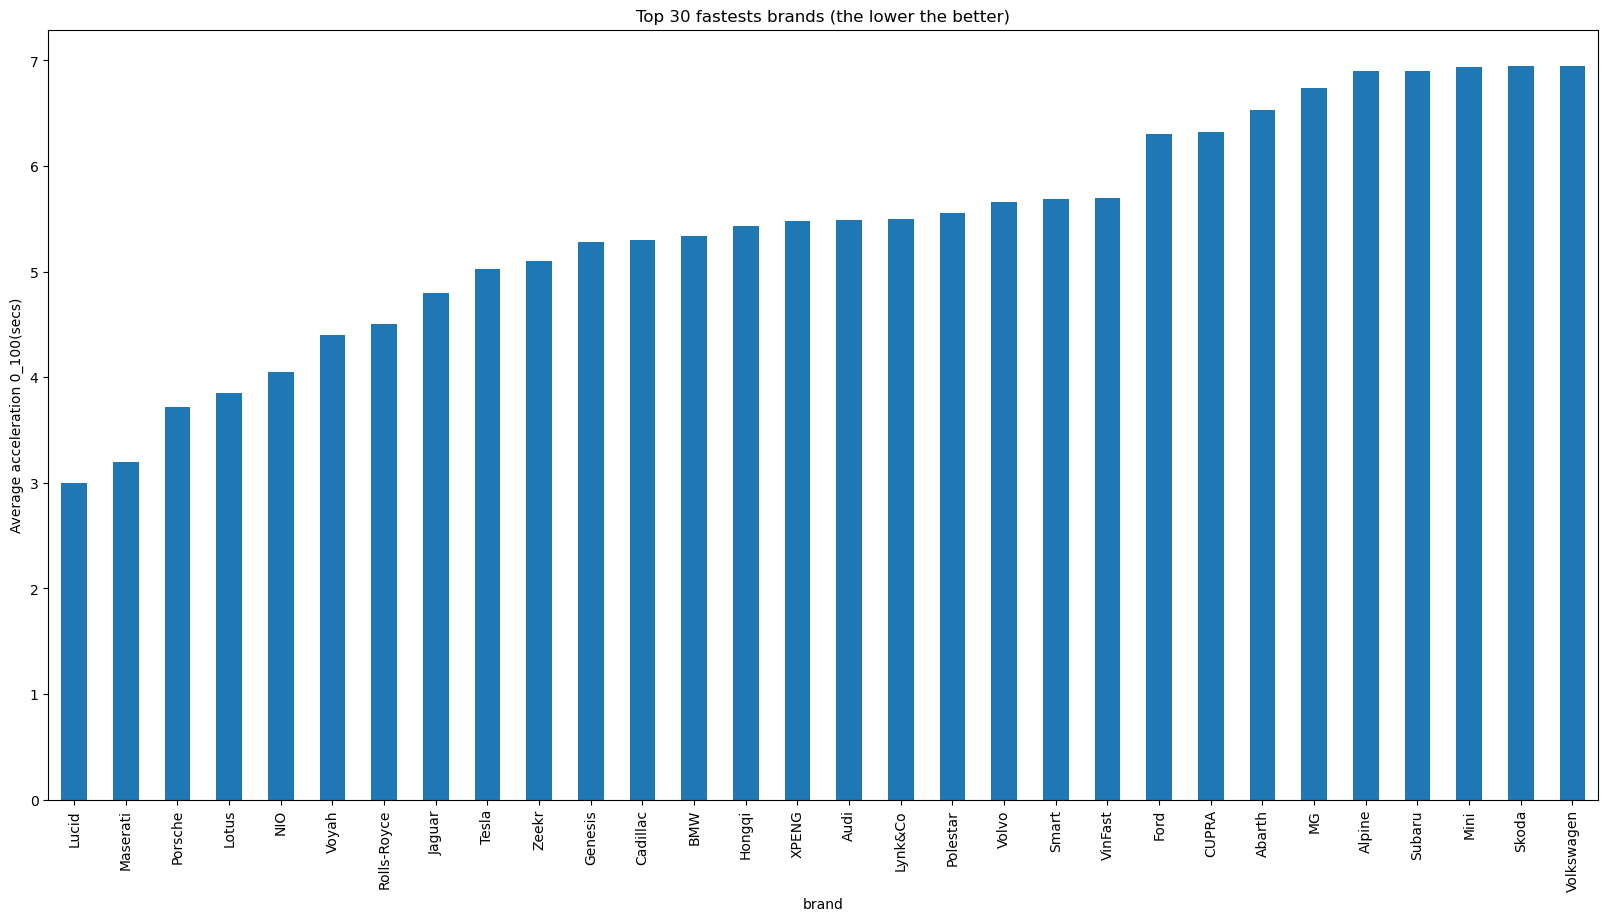

In [45]:
plt.figure(figsize=(20,10))
avg_acceleration.nsmallest(30).plot(kind='bar')
plt.title('Top 30 fastests brands (the lower the better)')
plt.ylabel('Average acceleration 0_100(secs)')
plt.xlabel('brand')

In [46]:
avg_charging_power=df.groupby('brand')['fast_charging_power_kw_dc'].mean()

In [47]:
print(avg_charging_power.nlargest())

brand
Porsche    252.000000
Lotus      249.500000
Genesis    190.000000
Lucid      184.000000
Audi       180.142857
Name: fast_charging_power_kw_dc, dtype: float64


Text(0.5, 0, 'brand')

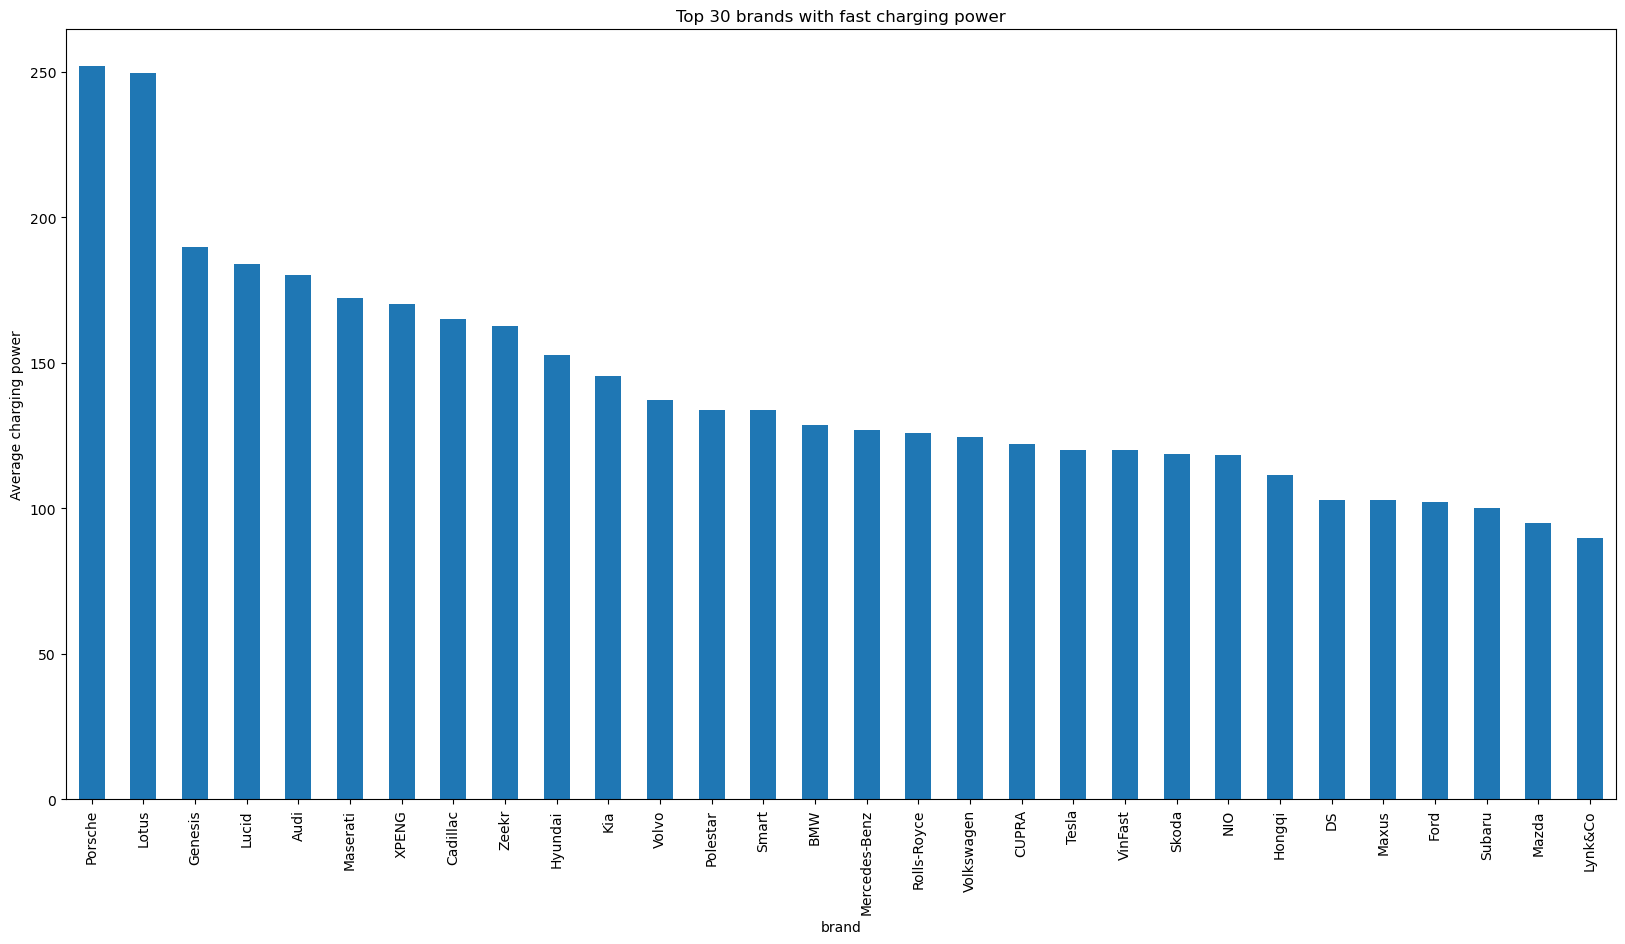

In [48]:
plt.figure(figsize=(20,10))
avg_charging_power.nlargest(30).plot(kind='bar')
plt.title('Top 30 brands with fast charging power')
plt.ylabel('Average charging power')
plt.xlabel('brand')

# Average values for each brands with different models based on there important features

In [50]:
# Calculation of the average values for each brands based on there most important features.'charging power,top speed,battery capacity,efficiency, torque,
# range, and acceleration.'

brand_summary=df.groupby('brand')[[
'fast_charging_power_kw_dc',
'top_speed_kmh',
'battery_capacity_kWh',
'torque_nm',
'efficiency_wh_per_km',
'range_km',
'acceleration_0_100_s',
]].mean()

In [51]:
(brand_summary).head(10)

,fast_charging_power_kw_dc,top_speed_kmh,battery_capacity_kWh,torque_nm,efficiency_wh_per_km,range_km,acceleration_0_100_s
brand,,,,,,,
Abarth,73.000000,177.500000,44.300000,290.000000,155.250000,252.500000,6.525000
Aiways,78.000000,155.000000,60.000000,312.500000,153.000000,332.500000,7.250000
Alfa,85.000000,175.000000,50.800000,302.500000,146.000000,315.000000,7.500000
Alpine,70.000000,165.000000,52.000000,292.500000,141.000000,307.500000,6.900000
Audi,180.142857,208.928571,86.071429,656.892857,160.250000,478.392857,5.489286
BMW,128.600000,206.300000,83.745000,612.600000,175.200000,458.250000,5.340000
BYD,83.312500,177.812500,67.356250,385.625000,155.812500,356.562500,7.718750
CUPRA,122.000000,176.000000,73.800000,451.000000,150.800000,431.000000,6.320000
Cadillac,165.000000,210.000000,102.000000,610.000000,192.000000,460.000000,5.300000


# Ranking brands based on important features

### Ranking fast charging power

In [54]:
#Higher is better(descending)
brand_summary['fast charging power rank']=brand_summary['fast_charging_power_kw_dc'].rank(ascending=False).astype(int)
print(brand_summary['fast charging power rank'].head(10))

brand
Abarth      47
Aiways      44
Alfa        36
Alpine      48
Audi         5
BMW         15
BYD         38
CUPRA       19
Cadillac     8
Citroen     46
Name: fast charging power rank, dtype: int32


### Ranking Top speed(kmh)

In [56]:
#Higher is better(descending)
brand_summary['top speed rank']=brand_summary['top_speed_kmh'].rank(ascending=False).astype(int)
print(brand_summary['top speed rank'].head(10))

brand
Abarth      28
Aiways      46
Alfa        33
Alpine      40
Audi         9
BMW         10
BYD         27
CUPRA       30
Cadillac     7
Citroen     57
Name: top speed rank, dtype: int32


### Ranking battery capacity(kWh)

In [58]:
#Higher is better(descending)
brand_summary['battery capacity rank']=brand_summary['battery_capacity_kWh'].rank(ascending=False).astype(int)
print(brand_summary['battery capacity rank'].head(10))

brand
Abarth      55
Aiways      45
Alfa        52
Alpine      50
Audi        12
BMW         15
BYD         35
CUPRA       27
Cadillac     3
Citroen     51
Name: battery capacity rank, dtype: int32


### Ranking torque(nm)

In [60]:
#Higher is better(descending)
brand_summary['torque rank']=brand_summary['torque_nm'].rank(ascending=False).astype(int)
print(brand_summary['torque rank'].head(10))

brand
Abarth      49
Aiways      43
Alfa        46
Alpine      48
Audi        10
BMW         13
BYD         28
CUPRA       24
Cadillac    15
Citroen     55
Name: torque rank, dtype: int32


### Ranking Range(km)

In [62]:
#Higher is better(descending)
brand_summary['range rank']=brand_summary['range_km'].rank(ascending=False).astype(int)
print(brand_summary['range rank'].head(10))

brand
Abarth      55
Aiways      43
Alfa        46
Alpine      49
Audi         5
BMW         10
BYD         35
CUPRA       14
Cadillac     9
Citroen     54
Name: range rank, dtype: int32


### Ranking fastest brands(acceleration 0-100(secs))

In [64]:
#Lower is better(ascending)
brand_summary['acceleration rank']=brand_summary['acceleration_0_100_s'].rank(ascending=True).astype(int)
print(brand_summary['acceleration rank'].head(10))

brand
Abarth      24
Aiways      33
Alfa        36
Alpine      26
Audi        16
BMW         13
BYD         42
CUPRA       23
Cadillac    12
Citroen     56
Name: acceleration rank, dtype: int32


### Ranking Efficiency(wh/km)(how much energy each brand consumes to travel a certain distance) 

In [66]:
#Lower is better(ascending)
brand_summary['efficiency rank']=brand_summary['efficiency_wh_per_km'].rank(ascending=True).astype(int)
print(brand_summary['efficiency rank'].head(10))

brand
Abarth      30
Aiways      25
Alfa        14
Alpine      11
Audi        39
BMW         43
BYD         31
CUPRA       22
Cadillac    48
Citroen     41
Name: efficiency rank, dtype: int32


# Computing total score(sum of ranking)

### Lower Total Score = Better Brand Overall

In [69]:
brand_summary['Total Score']=(
    brand_summary['fast charging power rank']+
    brand_summary['top speed rank']+
    brand_summary['battery capacity rank']+
    brand_summary['torque rank']+
    brand_summary['range rank']+
    brand_summary['acceleration rank']+
    brand_summary['efficiency rank']
)

In [70]:
top_brands=brand_summary.sort_values('Total Score')

# Overall Best 20 Brands based on important features.

In [72]:
rounded_top=top_brands[['fast_charging_power_kw_dc','top_speed_kmh','battery_capacity_kWh',
                 'torque_nm','range_km','acceleration_0_100_s','efficiency_wh_per_km',
                 'Total Score']].round(2) 
display(rounded_top.head(20))

,fast_charging_power_kw_dc,top_speed_kmh,battery_capacity_kWh,torque_nm,range_km,acceleration_0_100_s,efficiency_wh_per_km,Total Score
brand,,,,,,,,
Lucid,184.00,270.00,112.00,1200.00,665.00,3.00,143.00,22
Porsche,252.00,246.73,93.87,785.73,502.88,3.72,179.62,67
Lotus,249.50,252.67,103.95,801.67,489.17,3.85,219.17,76
Rolls-Royce,126.00,250.00,102.00,900.00,465.00,4.50,192.00,90
Audi,180.14,208.93,86.07,656.89,478.39,5.49,160.25,96
Maserati,172.33,278.33,87.00,1173.33,405.00,3.20,200.00,97
Tesla,120.00,209.71,70.86,495.29,472.14,5.03,124.00,102
Cadillac,165.00,210.00,102.00,610.00,460.00,5.30,192.00,102
Polestar,133.89,200.00,90.33,636.56,478.33,5.56,156.44,105


# Dataset Information

### This analysis is based on the Electric Vehicles Spec 2025 downloaded from Kaggle. The table ranks the top 20 EV brands based on a combination of fast charging power, top speed, battery capacity, torque, range, acceleration, and efficiency. Lower total score represent better overall performance.
